In [237]:
import nltk
from nltk.corpus import state_union


import pandas as pd
import os



from sklearn.feature_extraction.text import CountVectorizer 

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
#from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from sklearn.feature_extraction.text import TfidfVectorizer

In [238]:


#path = 'state-of-the-union-corpus-1989-2017'
#path = 'c:\\Users\\gabri\\AppData\\Roaming\\nltk_data\\corpora\\state_union' # file location
path = 'c:\\Users\\gabri\\OneDrive\\Documents\\Metis_NLP_Kaggle\\Speeches\\sotu' # file location
dirs = os.listdir(path)  # reads all the files in that directory
print (len(dirs)) #tell how many files

228


In [239]:
dirs[:] # file names

['Adams_1797.txt',
 'Adams_1798.txt',
 'Adams_1799.txt',
 'Adams_1800.txt',
 'Adams_1825.txt',
 'Adams_1826.txt',
 'Adams_1827.txt',
 'Adams_1828.txt',
 'Arthur_1881.txt',
 'Arthur_1882.txt',
 'Arthur_1883.txt',
 'Arthur_1884.txt',
 'Buchanan_1857.txt',
 'Buchanan_1858.txt',
 'Buchanan_1859.txt',
 'Buchanan_1860.txt',
 'Buren_1837.txt',
 'Buren_1838.txt',
 'Buren_1839.txt',
 'Buren_1840.txt',
 'Bush_1989.txt',
 'Bush_1990.txt',
 'Bush_1991.txt',
 'Bush_1992.txt',
 'Bush_2001.txt',
 'Bush_2002.txt',
 'Bush_2003.txt',
 'Bush_2004.txt',
 'Bush_2005.txt',
 'Bush_2006.txt',
 'Bush_2007.txt',
 'Bush_2008.txt',
 'Carter_1978.txt',
 'Carter_1979.txt',
 'Carter_1980.txt',
 'Carter_1981.txt',
 'Cleveland_1885.txt',
 'Cleveland_1886.txt',
 'Cleveland_1887.txt',
 'Cleveland_1888.txt',
 'Cleveland_1893.txt',
 'Cleveland_1894.txt',
 'Cleveland_1895.txt',
 'Cleveland_1896.txt',
 'Clinton_1993.txt',
 'Clinton_1994.txt',
 'Clinton_1995.txt',
 'Clinton_1996.txt',
 'Clinton_1997.txt',
 'Clinton_1998.txt'

# Selecting the first speech to see what we need to clean.

In [240]:
filename = os.path.join(path, dirs[0]) # dirs is a list, and we are going to study the first element dirs[0]
text_file = open(filename, 'r') #open the first file dirs[0]

In [241]:
lines = text_file.read() # read the file

In [242]:
lines # print what is in the file

'Gentlemen of the Senate and Gentlemen of the House of Representatives:\n\nI was for some time apprehensive that it would be necessary, on account of\nthe contagious sickness which afflicted the city of Philadelphia, to\nconvene the National Legislature at some other place. This measure it was\ndesirable to avoid, because it would occasion much public inconvenience and\na considerable public expense and add to the calamities of the inhabitants\nof this city, whose sufferings must have excited the sympathy of all their\nfellow citizens. Therefore, after taking measures to ascertain the state\nand decline of the sickness, I postponed my determination, having hopes,\nnow happily realized, that, without hazard to the lives or health of the\nmembers, Congress might assemble at this place, where it was next by law to\nmeet. I submit, however, to your consideration whether a power to postpone\nthe meeting of Congress, without passing the time fixed by the Constitution\nupon such occasions, wo

In [243]:
lines.replace('\n', ' ') # remove the \n symbols by replacing with an empty space
#print (lines)

'Gentlemen of the Senate and Gentlemen of the House of Representatives:  I was for some time apprehensive that it would be necessary, on account of the contagious sickness which afflicted the city of Philadelphia, to convene the National Legislature at some other place. This measure it was desirable to avoid, because it would occasion much public inconvenience and a considerable public expense and add to the calamities of the inhabitants of this city, whose sufferings must have excited the sympathy of all their fellow citizens. Therefore, after taking measures to ascertain the state and decline of the sickness, I postponed my determination, having hopes, now happily realized, that, without hazard to the lives or health of the members, Congress might assemble at this place, where it was next by law to meet. I submit, however, to your consideration whether a power to postpone the meeting of Congress, without passing the time fixed by the Constitution upon such occasions, would not be a u

In [244]:
sotu_data = []  #create an empty list
sotu_dict = {} # create an empty dictionary so that we can use file names to list the speeches by name

# Putting all the speeches into a list, after cleaning them

In [245]:
#The filter() function returns an iterator were the items are filtered
#through a function to test if the item is accepted or not.

# str.isalpha : checks if it is an alpha character.

# lower() : transform everything to lower case

# split() : Split a string into a list where each word is a list item

# loop over all the files:
for i in range(len(dirs)): # loop on all the speeches, dirs is the list of speeches
    filename = os.path.join(path, dirs[i]) # location of the speeches 
    text_file = open(filename, 'r')  # read the speeches 
    
    lines = text_file.read()  #read the speeches
    lines = lines.replace('\n', ' ') #replace \n by an empty string
    
    # tranform the speeches in lower cases, split them into a list and then filter to accept only alpha characters
    # finally it joins the words with an empty space
    clean_lines = ' '.join(filter(str.isalpha, lines.lower().split())) 
    #print(clean_lines)
    
    sotu_data.append(clean_lines) # append the clean speeches to the sotu_data list.
    sotu_dict[filename] = clean_lines # store in dict so we can access clean_lines by filename.
    

In [246]:
sotu_data[10] #11th speech/element

'to the congress of the united at the threshold of your deliberations i congratulate you upon the favorable aspect of the domestic and foreign affairs of this our relations with other countries continue to be upon a friendly with the argentine santo and sweden and norway no incident has occurred which calls for special the recent opening of new lines of telegraphic communication with central america and brazil permitted the interchange of messages of friendship with the governments of those during the year there have been perfected and proclaimed consular and commercial treaties with servia and a consular treaty with thus extending our intercourse with the danubian while our eastern relations have been put upon a wider basis by treaties with korea and the new treaty with a convention and a supplementary treaty of extradition with and conventions extending the duration of the claims commission have also been notice of the termination of the fisheries articles of the treaty of washington

In [247]:

speech_name = 'Wilson_1919.txt'
sotu_dict[path + '\\' + speech_name]


'to the senate and house of i sincerely regret that i cannot be present at the opening of this session of the i am thus prevented from presenting in as direct a way as i could wish the many questions that are pressing for solution at this i have had the advantage of the advice of the heads of the several executive departments who have kept in close touch with affairs in their detail and whose thoughtful recommendations i earnestly in the matter of the railroads and the readjustment of their affairs growing out of federal i shall take the liberty at a later date of addressing i hope that congress will bring to a conclusion at this session legislation looking to the establishment of a budget that there should be one single authority responsible for the making of all appropriations and that appropriations should be made not independently of each but with reference to one single comprehensive plan of expenditure properly related to the there can be no doubt i believe the burden of preparin

# Count Vectorize

In [248]:
#from notebook
#vectorizer = CountVectorizer(stop_words='english') #remove stop words: a, the, and, etc.
vectorizer = TfidfVectorizer(stop_words='english', max_df = 0.42, min_df = 0.01) #remove stop words: a, the, and, etc.

doc_word = vectorizer.fit_transform(sotu_data) #transform into sparse matrix (0, 1, 2, etc. for instance(s) in document)
pairwise_similarity = doc_word * doc_word.T
doc_word.shape # 228 = number of documents, 20932 = # of unique words)
#pairwise_similarity.toarray()

(228, 11105)

# Compare how similar speeches are to one another

In [249]:
df_similarity = pd.DataFrame(pairwise_similarity.toarray(), index = dirs, columns = dirs) 

df_similarity.head() #similarity dataframe, compares each document to eachother

,Adams_1797.txt,Adams_1798.txt,Adams_1799.txt,Adams_1800.txt,Adams_1825.txt,Adams_1826.txt,Adams_1827.txt,Adams_1828.txt,Arthur_1881.txt,Arthur_1882.txt,...,Washington_1795.txt,Washington_1796.txt,Wilson_1913.txt,Wilson_1914.txt,Wilson_1915.txt,Wilson_1916.txt,Wilson_1917.txt,Wilson_1918.txt,Wilson_1919.txt,Wilson_1920.txt
Adams_1797.txt,1.000000,0.269152,0.264646,0.195281,0.119931,0.103584,0.136739,0.134713,0.080974,0.051976,...,0.120352,0.223416,0.047043,0.053158,0.040385,0.039169,0.018783,0.054129,0.032131,0.033328
Adams_1798.txt,0.269152,1.000000,0.211385,0.151888,0.131361,0.116018,0.152770,0.136171,0.093285,0.062247,...,0.098413,0.229677,0.043462,0.071343,0.058277,0.041625,0.038411,0.058413,0.041159,0.034069
Adams_1799.txt,0.264646,0.211385,1.000000,0.210880,0.104504,0.096504,0.101278,0.107248,0.077476,0.068150,...,0.115140,0.177517,0.056652,0.049058,0.046112,0.045235,0.046177,0.062004,0.034616,0.039841
Adams_1800.txt,0.195281,0.151888,0.210880,1.000000,0.089601,0.092490,0.111983,0.086147,0.056718,0.052053,...,0.086643,0.120212,0.058849,0.052358,0.064198,0.037717,0.038340,0.062445,0.033563,0.050932
Adams_1825.txt,0.119931,0.131361,0.104504,0.089601,1.000000,0.264222,0.338434,0.272957,0.133556,0.100222,...,0.136087,0.159193,0.067339,0.074791,0.091162,0.057185,0.062247,0.100106,0.079736,0.069881


In [250]:
df_similarity.to_pickle("df_similarity.pkl") #pickle file

In [251]:
df_similarity['Speech_str'] = dirs #matrix comparing speech similarity

df_similarity['Year'] =df_similarity['Speech_str'].replace('[^0-9]', '', regex=True)
df_similarity.drop(['Speech_str'], axis=1)
df_similarity = df_similarity.sort_values(by=['Year'])
df_similarity.head()

,Adams_1797.txt,Adams_1798.txt,Adams_1799.txt,Adams_1800.txt,Adams_1825.txt,Adams_1826.txt,Adams_1827.txt,Adams_1828.txt,Arthur_1881.txt,Arthur_1882.txt,...,Wilson_1913.txt,Wilson_1914.txt,Wilson_1915.txt,Wilson_1916.txt,Wilson_1917.txt,Wilson_1918.txt,Wilson_1919.txt,Wilson_1920.txt,Speech_str,Year
Washington_1790.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Washington_1790.txt,1790
Washington_1791.txt,0.119765,0.114994,0.130433,0.130345,0.159017,0.101444,0.112578,0.128566,0.071189,0.052812,...,0.049210,0.054686,0.050572,0.052517,0.030781,0.056847,0.052789,0.035088,Washington_1791.txt,1791
Washington_1792.txt,0.130385,0.115580,0.109789,0.100310,0.114635,0.091766,0.123922,0.086442,0.065541,0.082420,...,0.040585,0.046117,0.053532,0.048841,0.038594,0.056765,0.044333,0.034816,Washington_1792.txt,1792
Washington_1793.txt,0.114578,0.140666,0.097169,0.119850,0.116898,0.092008,0.097020,0.075591,0.060278,0.064330,...,0.061748,0.049578,0.072306,0.037241,0.025320,0.050697,0.042834,0.026475,Washington_1793.txt,1793
Washington_1794.txt,0.080602,0.093374,0.115329,0.103825,0.125046,0.097008,0.117604,0.076936,0.064761,0.055384,...,0.048498,0.058663,0.074737,0.052910,0.040718,0.059293,0.055939,0.029237,Washington_1794.txt,1794


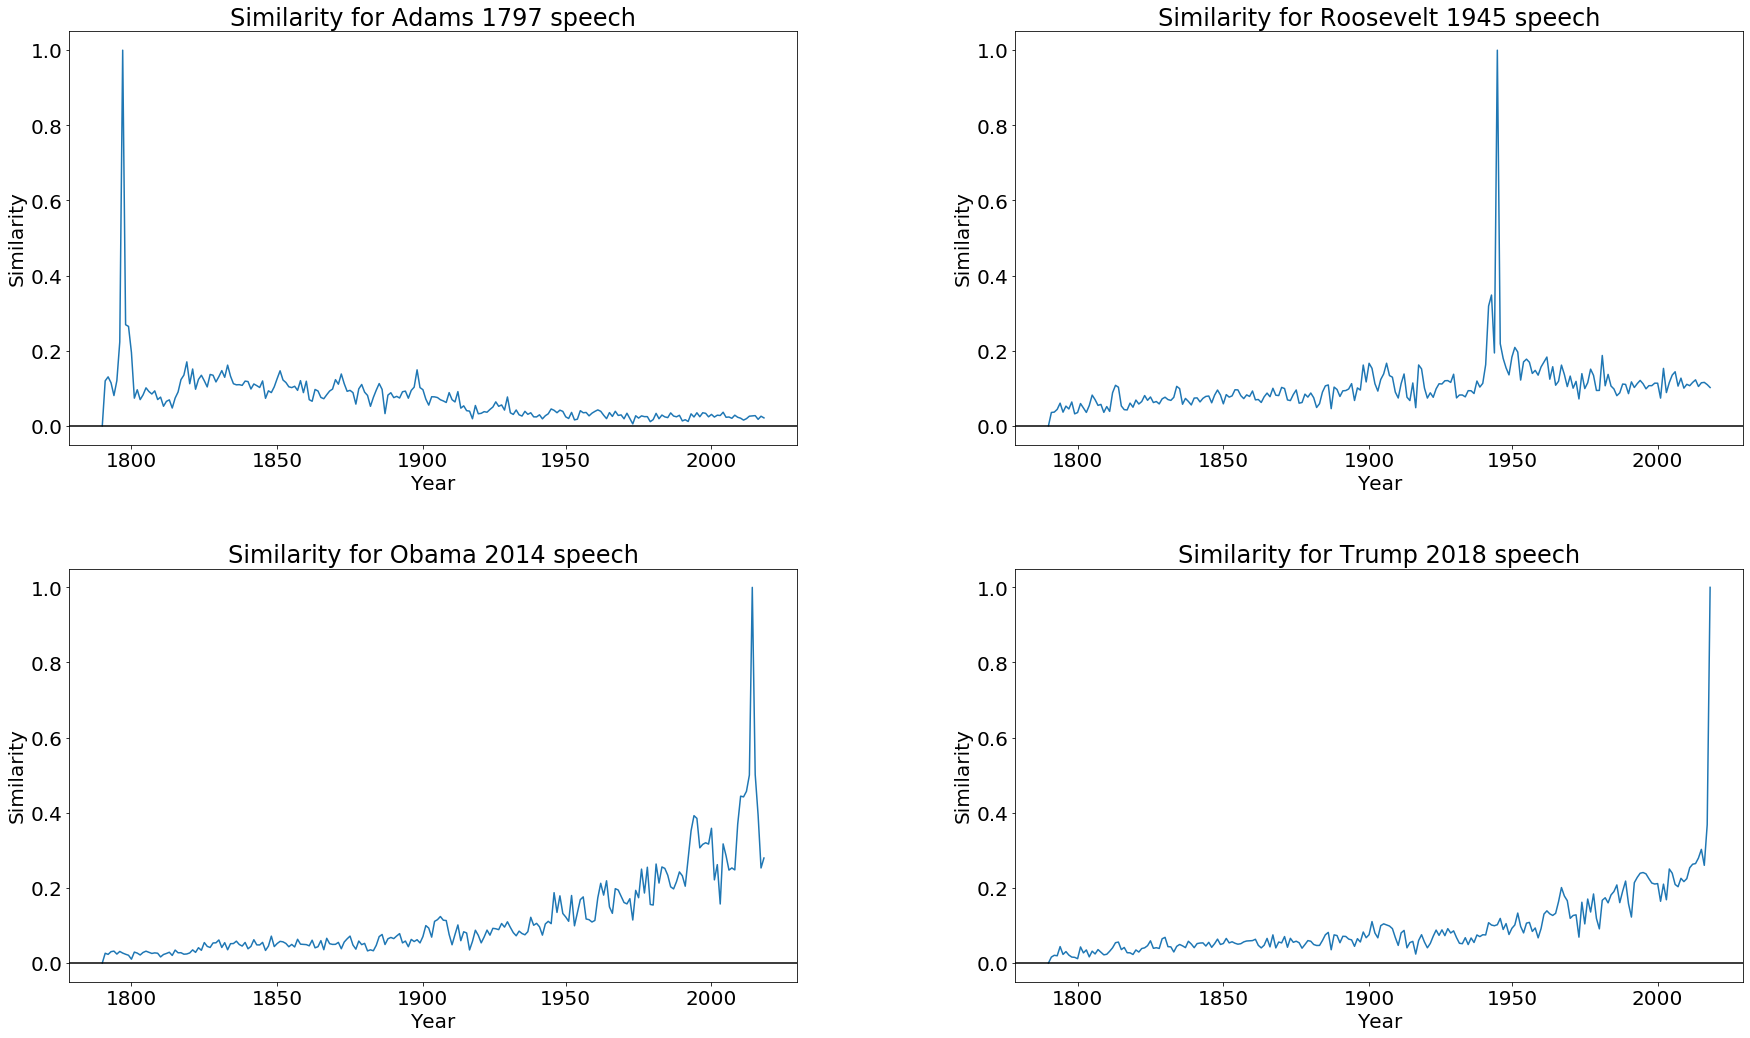

In [252]:
plt.subplots(2, 2, figsize=(30, 15), sharex=True) #4 speeches similarity
#

plt.rcParams.update({'font.size': 20})

plt.subplot(2, 2, 1)
plt.plot(df_similarity['Year'], df_similarity['Adams_1797.txt'])
plt.title("Similarity for Adams 1797 speech")
plt.xlabel("Year")
plt.ylabel("Similarity")
plt.axhline(y=0.0, color='k', linestyle='-')


plt.xticks(['1800', '1850','1900','1950','2000'])  # Set label locations.



plt.subplot(2, 2, 2)
plt.plot(df_similarity['Year'], df_similarity['Roosevelt_1945.txt'])
plt.title("Similarity for Roosevelt 1945 speech")
plt.xlabel("Year")
plt.ylabel("Similarity")
plt.axhline(y=0.0, color='k', linestyle='-')

plt.xticks(['1800', '1850','1900','1950','2000'])  # Set label locations.


plt.subplot(2, 2, 3)
plt.plot(df_similarity['Year'], df_similarity['Obama_2014.txt'])
plt.title("Similarity for Obama 2014 speech")
plt.xlabel("Year")
plt.ylabel("Similarity")
plt.axhline(y=0.0, color='k', linestyle='-')

plt.xticks(['1800', '1850','1900','1950','2000'])  # Set label locations.



plt.subplot(2, 2, 4)
plt.plot(df_similarity['Year'], df_similarity['Trump_2018.txt'])
plt.title("Similarity for Trump 2018 speech")
plt.xlabel("Year")
plt.ylabel("Similarity")
plt.axhline(y=0.0, color='k', linestyle='-')

plt.xticks(['1800', '1850','1900','1950','2000'])  # Set label locations.

plt.subplots_adjust(top=0.90, bottom=0.02, wspace=0.30, hspace=0.3)
#sns.set()    
plt.show()

In [253]:
#(sotu_dict.keys())
#for i in range(0,len(dirs)):
# print(dirs[i])

# Transforming the doc into a dataframe

In [254]:
# We have to convert `.toarray()` because the vectorizer returns a sparse matrix.
# For a big corpus, we would skip the dataframe and keep the output sparse.
#pd.DataFrame(doc_word.toarray(), index=sotu_data, columns=vectorizer.get_feature_names()).head(10) #doc_word.toarray() makes 7x19 table, otherwise it would be 
#represented in 2 columns

#from notebook
pd.DataFrame(doc_word.toarray(), index=dirs, columns=vectorizer.get_feature_names()).head(95) #doc_word.toarray() makes 7x19 table, otherwise it would be 
#represented in 2 columns

,abandon,abandoned,abandoning,abandonment,abate,abated,abatement,abdication,abeyance,abhors,...,youths,yukon,zeal,zealand,zealous,zealously,zelaya,zero,zone,zones
Adams_1797.txt,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.052936,0.0,0.0,0.0,0.000000,0.000000
Adams_1798.txt,0.031552,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
Adams_1799.txt,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.04703,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
Adams_1800.txt,0.049653,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.076964,0.0,0.0,0.0,0.000000,0.000000
Adams_1825.txt,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hoover_1929.txt,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.018805,0.019872
Hoover_1930.txt,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
Hoover_1931.txt,0.015984,0.0,0.0,0.022122,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
Hoover_1932.txt,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


# Topic Modeling using nmf

In [255]:
n_topics = 8 # number of topics
nmf_model = NMF(n_topics) # create an object
doc_topic = nmf_model.fit_transform(doc_word) #break into 10 components like SVD

In [256]:
topic_word = pd.DataFrame(nmf_model.components_.round(3), #,"component_9","component_10","component_11","component_12"
             index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8"],
             columns = vectorizer.get_feature_names()) #8 components in final draft
topic_word

,abandon,abandoned,abandoning,abandonment,abate,abated,abatement,abdication,abeyance,abhors,...,youths,yukon,zeal,zealand,zealous,zealously,zelaya,zero,zone,zones
component_1,0.011,0.023,0.000,0.016,0.007,0.002,0.008,0.000,0.011,0.009,...,0.009,0.009,0.030,0.003,0.008,0.010,0.014,0.005,0.013,0.004
component_2,0.004,0.009,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.007,0.005,0.023
component_3,0.006,0.004,0.004,0.002,0.001,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.000,0.003,0.004
component_4,0.019,0.009,0.004,0.003,0.000,0.000,0.006,0.003,0.000,0.000,...,0.013,0.000,0.038,0.000,0.026,0.006,0.000,0.000,0.000,0.000
component_5,0.017,0.009,0.005,0.009,0.000,0.000,0.000,0.004,0.004,0.000,...,0.000,0.006,0.002,0.000,0.004,0.002,0.010,0.000,0.021,0.000
component_6,0.025,0.000,0.010,0.001,0.001,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.001,0.000
component_7,0.012,0.018,0.003,0.011,0.000,0.006,0.003,0.000,0.000,0.001,...,0.000,0.000,0.012,0.002,0.001,0.004,0.000,0.000,0.000,0.000
component_8,0.024,0.000,0.008,0.001,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.007,0.001,0.000


In [257]:
#https://stackoverflow.com/questions/16486252/is-it-possible-to-use-argsort-in-descending-order/16486299
#list the top words for each Component:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_): # loop over the model components
        print("Component_" +  "%d:" % topic_idx ) # print the component 
        # join the top words by an empty space
        # argsort : sorts the list  in increasing order, meaning the top are the last words
        # then select the top words
        # -1 loops backwards
        # reading from the tail to find the largest elements
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) 
    print()

# Top 15 words in each component

In [258]:
n_top_words = 15 
feature_names = vectorizer.get_feature_names()
print_top_words(nmf_model, feature_names, n_top_words)

Component_0:
silver gold cent bonds products postal diplomatic consular notes spain indians currency coinage tariff spanish
Component_1:
jobs tonight budget families businesses cut child parents job deficit thank percent spending college nuclear
Component_2:
program programs billion farm major budget housing today achieve assistance basic areas insurance inflation wage
Component_3:
spain tribes objects france french militia article ports gentlemen execution navigation commissioners colonies ensuing respecting
Component_4:
interstate industrial tariff corporations court forest conference method islands agriculture canal methods bureau board panama
Component_5:
soviet communist fighting japanese threat weapons rulers fight atomic aggression peoples planes task allies win
Component_6:
mexico texas mexican bank paper specie currency banks whilst notes territorial consequence slavery california kansas
Component_7:
iraqi terrorists iraq al terrorist qaeda iraqis saddam fight women terror wor

In [259]:
#Component x Speech

H = pd.DataFrame(doc_topic.round(5),   index=dirs, #,"component_9","component_10"          
             columns = ["component_1","component_2", "component_3","component_4","component_5","component_6","component_7","component_8"])

In [260]:
H.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
Adams_1797.txt,0.00000,0.00257,0.0,0.23435,0.00000,0.00000,0.00000,0.0
Adams_1798.txt,0.00000,0.00000,0.0,0.24433,0.00000,0.00244,0.00000,0.0
Adams_1799.txt,0.00000,0.00000,0.0,0.21649,0.00000,0.00000,0.00000,0.0
Adams_1800.txt,0.00000,0.00000,0.0,0.18912,0.00000,0.00433,0.00000,0.0
Adams_1825.txt,0.00266,0.00610,0.0,0.29521,0.03376,0.00267,0.02471,0.0


In [261]:
H.iloc[30:35]

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
Bush_2007.txt,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.54497
Bush_2008.txt,0.0,0.00000,0.01101,0.0,0.0,0.00000,0.0,0.55597
Carter_1978.txt,0.0,0.18927,0.19156,0.0,0.0,0.05729,0.0,0.00000
Carter_1979.txt,0.0,0.11235,0.12281,0.0,0.0,0.15730,0.0,0.00000
Carter_1980.txt,0.0,0.02369,0.00000,0.0,0.0,0.44908,0.0,0.00000


In [262]:
H.iloc[60:70]

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
Eisenhower_1956.txt,0.00933,0.00000,0.46115,0.00000,0.00164,0.02479,0.00000,0.00000
Eisenhower_1957.txt,0.00000,0.00000,0.27900,0.00459,0.02054,0.06096,0.01044,0.00000
Eisenhower_1958.txt,0.00000,0.00000,0.17634,0.00121,0.00000,0.26856,0.00000,0.00000
Eisenhower_1959.txt,0.00000,0.00000,0.30661,0.00313,0.00448,0.08810,0.00862,0.00000
Eisenhower_1960.txt,0.00311,0.00000,0.24342,0.01242,0.02001,0.15471,0.01518,0.00000
Eisenhower_1961.txt,0.00000,0.00000,0.42394,0.00000,0.00000,0.05715,0.00000,0.00000
Fillmore_1850.txt,0.00340,0.00000,0.00000,0.08993,0.03671,0.00000,0.27784,0.00000
Fillmore_1851.txt,0.06835,0.00000,0.00000,0.10832,0.00000,0.00000,0.25757,0.00287
Fillmore_1852.txt,0.04715,0.00358,0.00000,0.11686,0.01511,0.00000,0.21935,0.00000
Ford_1975.txt,0.00000,0.09474,0.26130,0.00000,0.00000,0.01122,0.00000,0.00000


In [263]:
H.iloc[225:230]

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
Wilson_1918.txt,0.0,0.00000,0.00000,0.02736,0.18483,0.13428,0.00000,0.00000
Wilson_1919.txt,0.0,0.00465,0.06213,0.00000,0.24415,0.00351,0.00568,0.00000
Wilson_1920.txt,0.0,0.00717,0.04493,0.00317,0.14390,0.02087,0.02093,0.01346


# Use NMF to plot top 15 words for each of 8 components

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 4, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


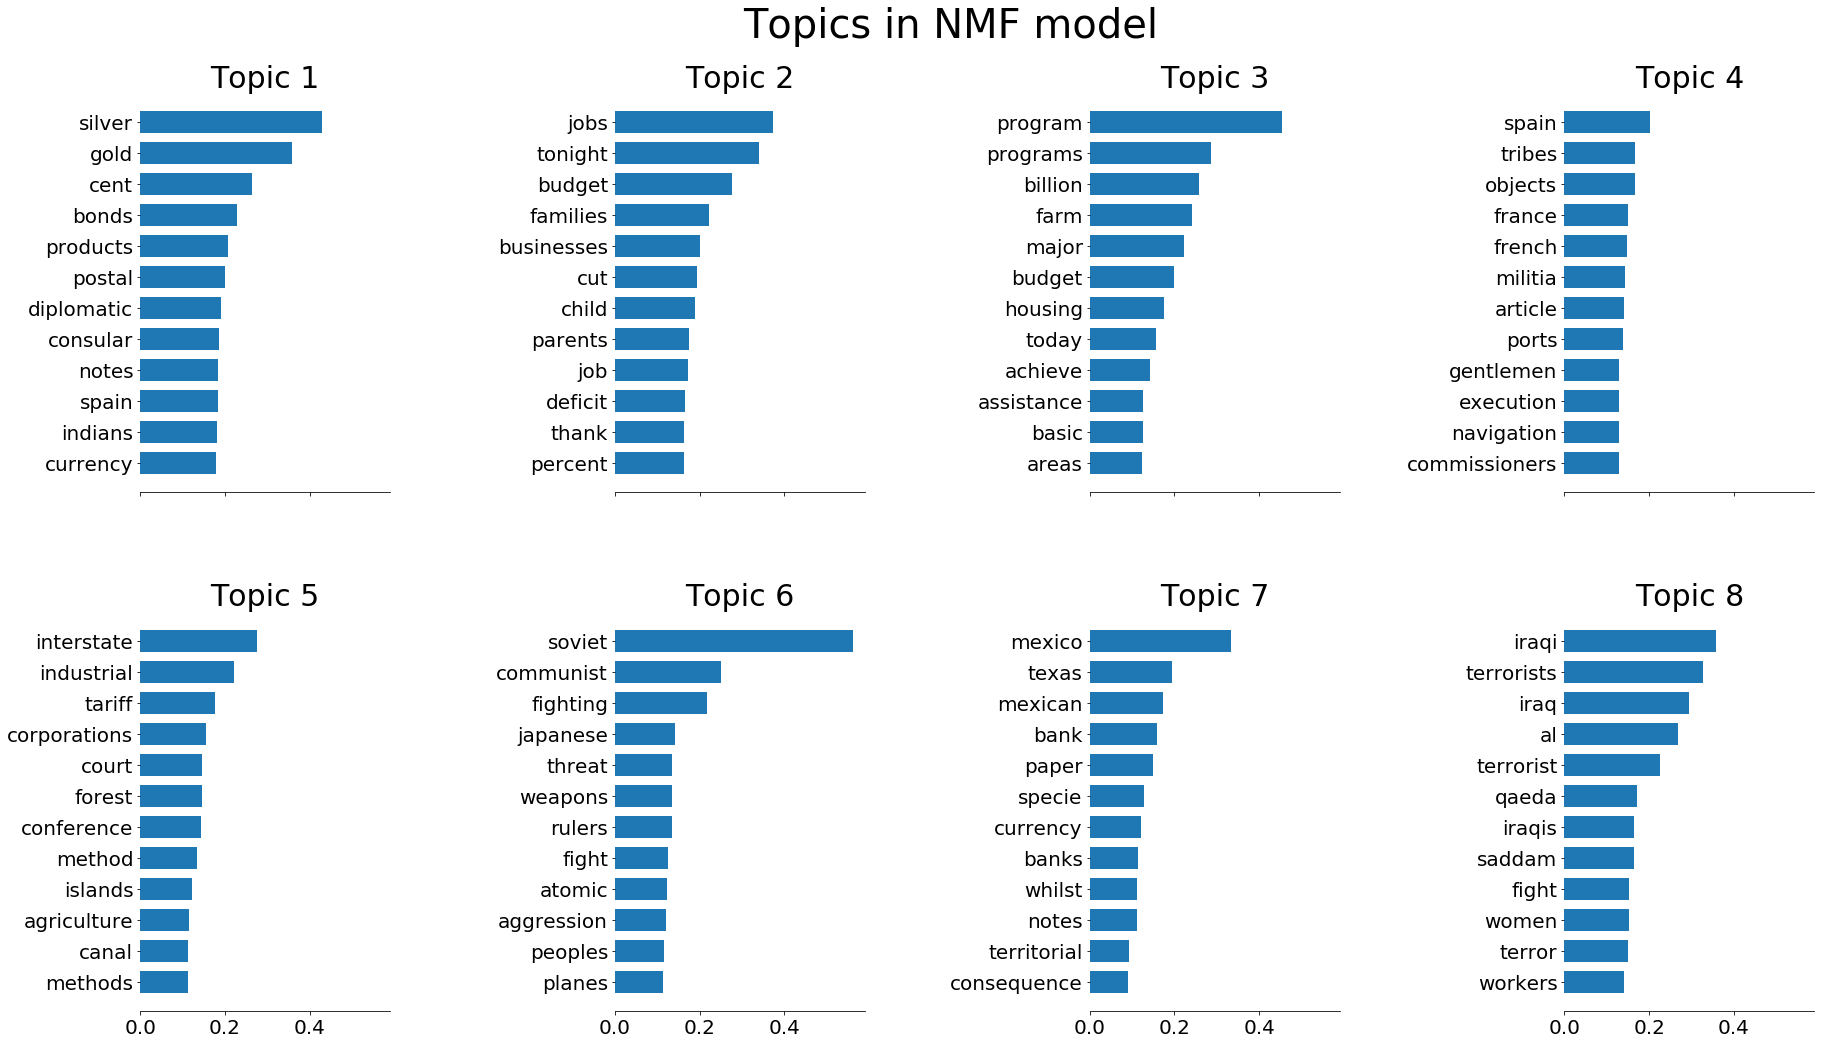

In [264]:
n_top_words = 12
feature_names = vectorizer.get_feature_names()
plot_top_words(nmf_model, feature_names, n_top_words,
               'Topics in NMF model') #title


# Sort speeches Chronologically

In [265]:
H1 = H
H1['Speech_str'] = dirs
H1['Year'] = H1['Speech_str'].replace('[^0-9]', '', regex=True)
H1 = H1.sort_values(by = ['Year'])
H1.to_csv("Data_H1.csv", index = False) #Save chronologically sorted speeches in this csv
H1.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,Speech_str,Year
Washington_1790.txt,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,Washington_1790.txt,1790
Washington_1791.txt,0.0,0.00000,0.00324,0.22001,0.00182,0.00000,0.00000,0.00000,Washington_1791.txt,1791
Washington_1792.txt,0.0,0.00006,0.00129,0.21151,0.00469,0.00000,0.00000,0.00000,Washington_1792.txt,1792
Washington_1793.txt,0.0,0.00000,0.00287,0.18146,0.01530,0.00000,0.00517,0.00803,Washington_1793.txt,1793
Washington_1794.txt,0.0,0.00138,0.00000,0.17824,0.01485,0.01737,0.02184,0.01302,Washington_1794.txt,1794


In [266]:
H1.to_pickle("H1.pkl") #pickle chronological csv file

# Plots of Components over Time (check Powerpoint/Readme for more insights)

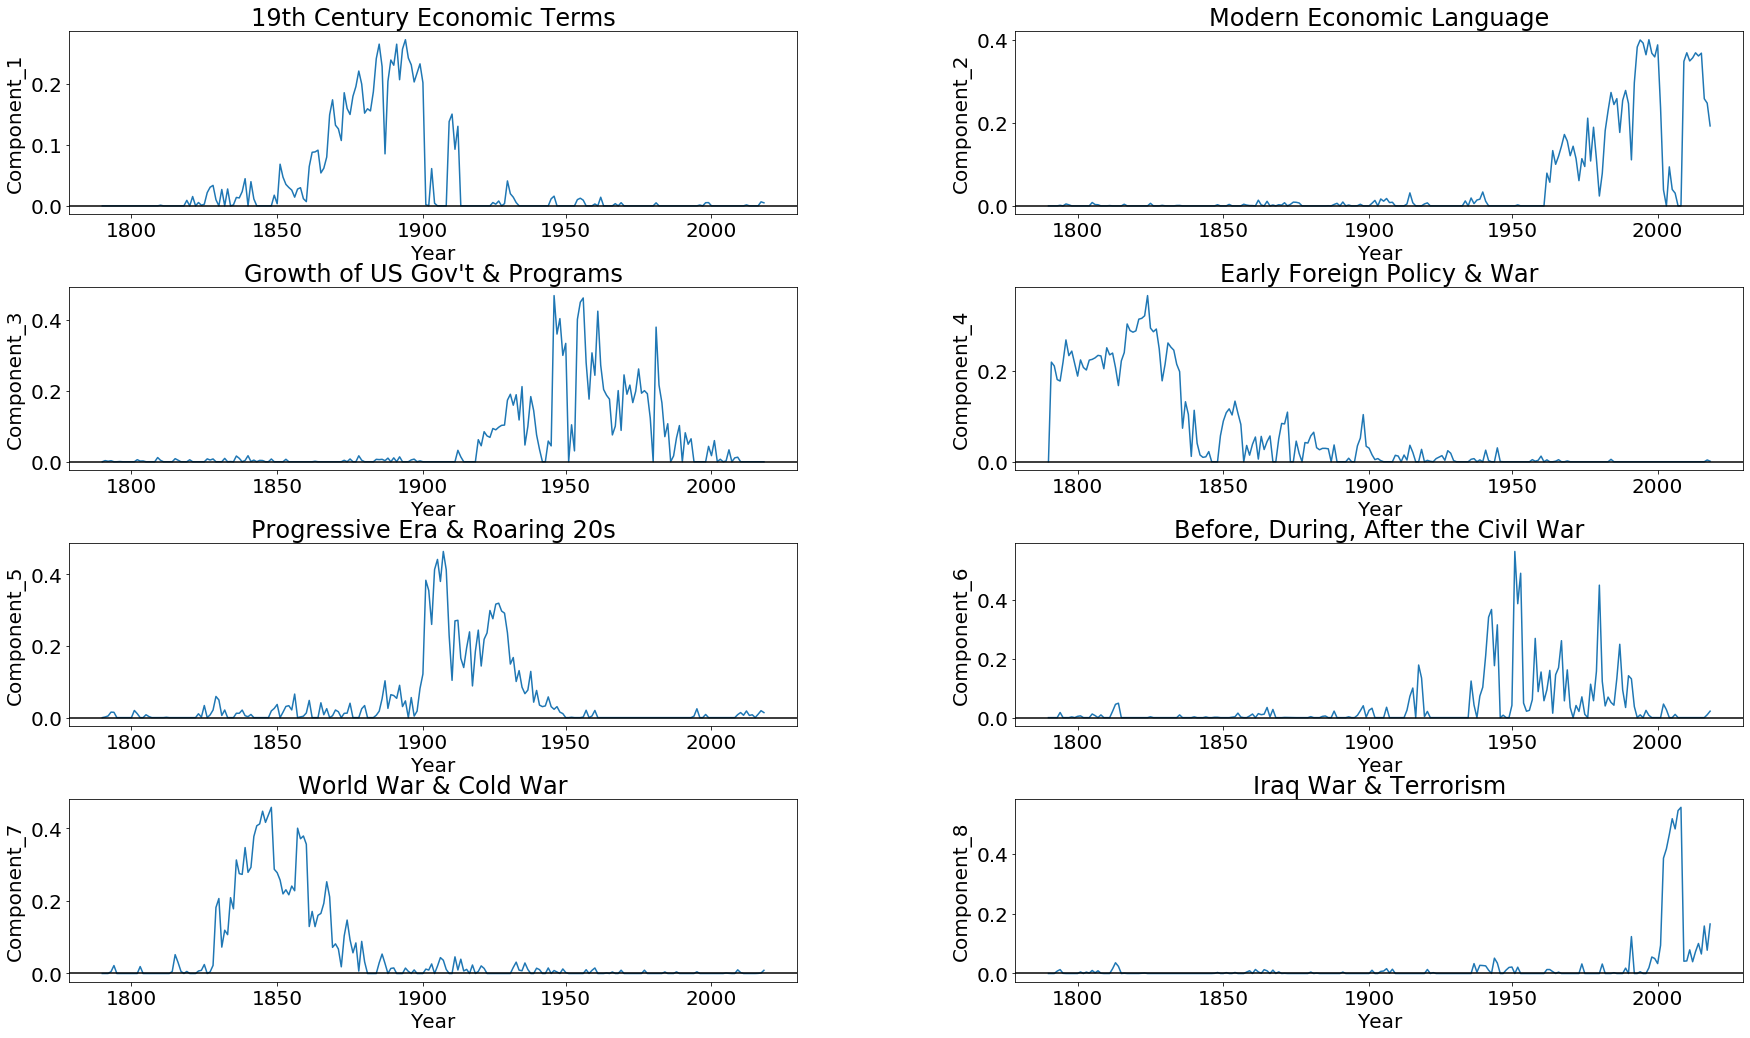

In [267]:
plt.subplots(4, 2, figsize=(30, 15), sharex=True)

plt.rcParams.update({'font.size': 20})


plt.subplot(4, 2, 1)
plt.plot(H1['Year'], H1['component_1'] ) #Label axis and titles for all plots
plt.title("19th Century Economic Terms")
plt.xlabel("Year")
plt.ylabel("Component_1")


plt.axhline(y=0.0, color='k', linestyle='-')

plt.xticks(['1800', '1850','1900','1950','2000'])  # Set label locations.




plt.subplot(4, 2, 2)
plt.plot(H1['Year'], H1['component_2'])
plt.title("Modern Economic Language")
plt.xlabel("Year")
plt.ylabel("Component_2")
plt.axhline(y=0.0, color='k', linestyle='-')

plt.xticks(['1800', '1850','1900','1950','2000'])  # Set label locations.


plt.subplot(4, 2, 3)
plt.plot(H1['Year'], H1['component_3'])
plt.title("Growth of US Gov't & Programs")
plt.xlabel("Year")
plt.ylabel("Component_3")
plt.axhline(y=0.0, color='k', linestyle='-')

plt.xticks(['1800', '1850','1900','1950','2000'])  # Set label locations.


plt.subplot(4, 2, 4)
plt.plot(H1['Year'], H1['component_4'])
plt.title("Early Foreign Policy & War")
plt.xlabel("Year")
plt.ylabel("Component_4")
plt.axhline(y=0.0, color='k', linestyle='-')

plt.xticks(['1800', '1850','1900','1950','2000'])  # Set label locations.


plt.subplot(4, 2, 5)
plt.plot(H1['Year'], H1['component_5'])
plt.title("Progressive Era & Roaring 20s")
plt.xlabel("Year")
plt.ylabel("Component_5")
plt.axhline(y=0.0, color='k', linestyle='-')

plt.xticks(['1800', '1850','1900','1950','2000'])  # Set label locations.


plt.subplot(4, 2, 6)
plt.plot(H1['Year'], H1['component_6'])
plt.title("Before, During, After the Civil War")
plt.xlabel("Year")
plt.ylabel("Component_6")
plt.axhline(y=0.0, color='k', linestyle='-')

plt.xticks(['1800', '1850','1900','1950','2000'])  # Set label locations.


plt.subplot(4, 2, 7)
plt.plot(H1['Year'], H1['component_7'])
plt.title("World War & Cold War")
plt.xlabel("Year")
plt.ylabel("Component_7")
plt.axhline(y=0.0, color='k', linestyle='-')

plt.xticks(['1800', '1850','1900','1950','2000'])  # Set label locations.


plt.subplot(4, 2, 8)
plt.plot(H1['Year'], H1['component_8'])
plt.title("Iraq War & Terrorism")
plt.xlabel("Year")
plt.ylabel("Component_8")
plt.axhline(y=0.0, color='k', linestyle='-')

plt.xticks(['1800', '1850','1900','1950','2000'])  # Set label locations.

plt.subplots_adjust(top=0.90, bottom=0.02, wspace=0.30, hspace=0.4)

plt.show()

## Component 1: 19th Century Economics

In [268]:
H1.iloc[75:85] #Starts 1831. Peak starts 1868 (apex=1894), Nosedive in 1901 w/ Teddy. 4 Yr resurgence under Taft (1909-1912)

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,Speech_str,Year
Johnson_1865.txt,0.05397,0.01099,0.00015,0.04464,0.04136,0.03440,0.16553,0.00889,Johnson_1865.txt,1865
Johnson_1866.txt,0.06172,0.00000,0.00000,0.05698,0.00810,0.00230,0.19327,0.00000,Johnson_1866.txt,1866
Johnson_1867.txt,0.08005,0.00209,0.00000,0.00000,0.02499,0.02769,0.25283,0.01140,Johnson_1867.txt,1867
Johnson_1868.txt,0.14937,0.00000,0.00000,0.00000,0.00000,0.00000,0.21116,0.00000,Johnson_1868.txt,1868
Grant_1869.txt,0.17395,0.00279,0.00000,0.05034,0.00530,0.00000,0.07199,0.00548,Grant_1869.txt,1869
Grant_1870.txt,0.13228,0.00180,0.00000,0.08459,0.02128,0.00000,0.08171,0.00000,Grant_1870.txt,1870
Grant_1871.txt,0.12629,0.00752,0.00000,0.08352,0.01634,0.00080,0.06749,0.00069,Grant_1871.txt,1871
Grant_1872.txt,0.10716,0.00000,0.00000,0.10957,0.00000,0.00055,0.01837,0.00000,Grant_1872.txt,1872
Grant_1873.txt,0.18556,0.00353,0.00414,0.00000,0.01201,0.00000,0.10373,0.00000,Grant_1873.txt,1873
Grant_1874.txt,0.15968,0.00898,0.00000,0.00000,0.01243,0.00000,0.14729,0.00025,Grant_1874.txt,1874


## Component 2: Modern Economic Language

In [269]:
H1.iloc[205:215] #1960s: Starts under JFK in 1961, peaks w/ Clinton, dips post 9/11 Bush, resurgence under Obama

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,Speech_str,Year
Clinton_1996.txt,0.00136,0.36377,0.00000,0.0,0.00000,0.02449,0.00000,0.00000,Clinton_1996.txt,1996
Clinton_1997.txt,0.00000,0.40002,0.00000,0.0,0.00000,0.00766,0.00000,0.01917,Clinton_1997.txt,1997
Clinton_1998.txt,0.00518,0.36748,0.00000,0.0,0.00876,0.00000,0.00000,0.05516,Clinton_1998.txt,1998
Clinton_1999.txt,0.00536,0.35866,0.04334,0.0,0.00000,0.00000,0.00000,0.05013,Clinton_1999.txt,1999
Clinton_2000.txt,0.00005,0.38758,0.01707,0.0,0.00000,0.00000,0.00000,0.03311,Clinton_2000.txt,2000
Bush_2001.txt,0.00000,0.23609,0.05954,0.0,0.00000,0.00000,0.00000,0.09427,Bush_2001.txt,2001
Bush_2002.txt,0.00000,0.03866,0.00000,0.0,0.00000,0.04592,0.00000,0.38597,Bush_2002.txt,2002
Bush_2003.txt,0.00000,0.00000,0.00707,0.0,0.00000,0.02696,0.00000,0.41697,Bush_2003.txt,2003
Bush_2004.txt,0.00000,0.09389,0.00000,0.0,0.00000,0.00000,0.00000,0.46510,Bush_2004.txt,2004
Bush_2005.txt,0.00000,0.03949,0.00198,0.0,0.00000,0.00000,0.00127,0.51793,Bush_2005.txt,2005


## Component 3: Growth of US Government and Federal Programs

In [270]:
H1.iloc[155:165] #1921, 1929-1935. Big peak in 1946-1950 (1951 Cold War). 1954-1961 Eisenhower. Low after Reagan Revolution (1984)

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,Speech_str,Year
Truman_1946.txt,0.01593,0.00000,0.46784,0.00049,0.02326,0.00000,0.00823,0.00000,Truman_1946.txt,1946
Truman_1947.txt,0.00000,0.00000,0.35948,0.00000,0.03057,0.00824,0.00427,0.00000,Truman_1947.txt,1947
Truman_1948.txt,0.00000,0.00000,0.40302,0.00000,0.01533,0.00000,0.00000,0.01141,Truman_1948.txt,1948
Truman_1949.txt,0.00000,0.00000,0.29941,0.00000,0.01116,0.00000,0.01254,0.02027,Truman_1949.txt,1949
Truman_1950.txt,0.00000,0.00000,0.33329,0.00000,0.00000,0.04154,0.00276,0.02166,Truman_1950.txt,1950
Truman_1951.txt,0.00000,0.00000,0.00000,0.00000,0.00000,0.56330,0.00000,0.00000,Truman_1951.txt,1951
Truman_1952.txt,0.00000,0.00222,0.10408,0.00000,0.00097,0.38619,0.00000,0.02111,Truman_1952.txt,1952
Truman_1953.txt,0.00000,0.00000,0.03054,0.00000,0.00000,0.48939,0.00000,0.00000,Truman_1953.txt,1953
Eisenhower_1954.txt,0.01024,0.00000,0.40081,0.00000,0.00000,0.04929,0.00000,0.00000,Eisenhower_1954.txt,1954
Eisenhower_1955.txt,0.01256,0.00000,0.44921,0.00000,0.00000,0.02155,0.00000,0.00000,Eisenhower_1955.txt,1955


## Component 4: Early Foreign Policy and War

In [271]:
H1.iloc[30:40] #Highest from 1790-1830, Washington to Jackson

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,Speech_str,Year
Monroe_1820.txt,0.00000,0.00000,0.00560,0.28914,0.00000,0.00000,0.00000,0.00000,Monroe_1820.txt,1820
Monroe_1821.txt,0.01532,0.00000,0.00000,0.31494,0.00000,0.00000,0.00000,0.00000,Monroe_1821.txt,1821
Monroe_1822.txt,0.00000,0.00000,0.00000,0.31672,0.00000,0.00000,0.00000,0.00086,Monroe_1822.txt,1822
Monroe_1823.txt,0.00551,0.00000,0.00000,0.32239,0.01072,0.00000,0.00690,0.00144,Monroe_1823.txt,1823
Monroe_1824.txt,0.00102,0.00000,0.00000,0.36698,0.00127,0.00000,0.00869,0.00000,Monroe_1824.txt,1824
Adams_1825.txt,0.00266,0.00610,0.00000,0.29521,0.03376,0.00267,0.02471,0.00000,Adams_1825.txt,1825
Adams_1826.txt,0.02169,0.00000,0.00805,0.28710,0.00000,0.00000,0.00000,0.00000,Adams_1826.txt,1826
Adams_1827.txt,0.03055,0.00000,0.00482,0.29311,0.00773,0.00000,0.00461,0.00000,Adams_1827.txt,1827
Adams_1828.txt,0.03359,0.00000,0.00786,0.24935,0.02112,0.00000,0.02227,0.00000,Adams_1828.txt,1828
Jackson_1829.txt,0.01008,0.00127,0.00000,0.17867,0.05904,0.00000,0.18196,0.00000,Jackson_1829.txt,1829


## Component 5: Progressive Era, Roaring 20s

In [272]:
H1.iloc[115:125] #Peaks in 1900-1930.Especially Teddy Roosevelt. Dip around WW1

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,Speech_str,Year
Roosevelt_1905.txt,0.00000,0.01126,0.00000,0.00000,0.44131,0.00000,0.02046,0.00824,Roosevelt_1905.txt,1905
Roosevelt_1906.txt,0.00000,0.01773,0.00000,0.00000,0.37986,0.03514,0.04380,0.01623,Roosevelt_1906.txt,1906
Roosevelt_1907.txt,0.00000,0.00794,0.00000,0.00000,0.46353,0.00000,0.03656,0.00198,Roosevelt_1907.txt,1907
Roosevelt_1908.txt,0.00000,0.00869,0.00000,0.00000,0.41247,0.00000,0.01123,0.01429,Roosevelt_1908.txt,1908
Taft_1909.txt,0.13827,0.00000,0.00000,0.01423,0.22898,0.00000,0.00000,0.00000,Taft_1909.txt,1909
Taft_1910.txt,0.15050,0.00000,0.00000,0.01249,0.10397,0.00000,0.00000,0.00000,Taft_1910.txt,1910
Taft_1911.txt,0.09280,0.00000,0.00000,0.00000,0.26987,0.00000,0.04587,0.00000,Taft_1911.txt,1911
Taft_1912.txt,0.13052,0.00000,0.03218,0.01483,0.27160,0.00000,0.00964,0.00000,Taft_1912.txt,1912
Wilson_1913.txt,0.00000,0.00462,0.01374,0.00360,0.16564,0.02521,0.03940,0.00000,Wilson_1913.txt,1913
Wilson_1914.txt,0.00000,0.03126,0.00000,0.03642,0.13969,0.07219,0.00686,0.00000,Wilson_1914.txt,1914


## Component 6: War Before, During, and After the Civil War

In [273]:
H1.iloc[70:80] #Starts w/ Jackson 1829, Peaks w/ Mexican-American War (1846-1848). Drops 60% w/ Lincoln. Peak ends w/ Johnson 1868. Remains pretty low after 1876 (Reconstruction ends)

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,Speech_str,Year
Buchanan_1860.txt,0.00697,0.00068,0.00000,0.03860,0.01299,0.01221,0.35630,0.00000,Buchanan_1860.txt,1860
Lincoln_1861.txt,0.06449,0.00000,0.00000,0.05461,0.04800,0.00000,0.12946,0.01343,Lincoln_1861.txt,1861
Lincoln_1862.txt,0.08786,0.01369,0.00000,0.00588,0.00000,0.01354,0.17109,0.00530,Lincoln_1862.txt,1862
Lincoln_1863.txt,0.08849,0.00225,0.00131,0.05602,0.00000,0.00998,0.12913,0.00056,Lincoln_1863.txt,1863
Lincoln_1864.txt,0.09137,0.00000,0.00000,0.02696,0.00000,0.01174,0.16033,0.01285,Lincoln_1864.txt,1864
Johnson_1865.txt,0.05397,0.01099,0.00015,0.04464,0.04136,0.03440,0.16553,0.00889,Johnson_1865.txt,1865
Johnson_1866.txt,0.06172,0.00000,0.00000,0.05698,0.00810,0.00230,0.19327,0.00000,Johnson_1866.txt,1866
Johnson_1867.txt,0.08005,0.00209,0.00000,0.00000,0.02499,0.02769,0.25283,0.01140,Johnson_1867.txt,1867
Johnson_1868.txt,0.14937,0.00000,0.00000,0.00000,0.00000,0.00000,0.21116,0.00000,Johnson_1868.txt,1868
Grant_1869.txt,0.17395,0.00279,0.00000,0.05034,0.00530,0.00000,0.07199,0.00548,Grant_1869.txt,1869


## Component 7: World Wars and Korean War

In [274]:
H1.iloc[155:165] #Minor Peak around WW1. Masssive spike a response of Cold War, Korean War (1951). Eisenhower drops (except 1960 U2). Johnson Vietnam. Peaks again 1980 (Jimmy Carter foreign policy crises)

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,Speech_str,Year
Truman_1946.txt,0.01593,0.00000,0.46784,0.00049,0.02326,0.00000,0.00823,0.00000,Truman_1946.txt,1946
Truman_1947.txt,0.00000,0.00000,0.35948,0.00000,0.03057,0.00824,0.00427,0.00000,Truman_1947.txt,1947
Truman_1948.txt,0.00000,0.00000,0.40302,0.00000,0.01533,0.00000,0.00000,0.01141,Truman_1948.txt,1948
Truman_1949.txt,0.00000,0.00000,0.29941,0.00000,0.01116,0.00000,0.01254,0.02027,Truman_1949.txt,1949
Truman_1950.txt,0.00000,0.00000,0.33329,0.00000,0.00000,0.04154,0.00276,0.02166,Truman_1950.txt,1950
Truman_1951.txt,0.00000,0.00000,0.00000,0.00000,0.00000,0.56330,0.00000,0.00000,Truman_1951.txt,1951
Truman_1952.txt,0.00000,0.00222,0.10408,0.00000,0.00097,0.38619,0.00000,0.02111,Truman_1952.txt,1952
Truman_1953.txt,0.00000,0.00000,0.03054,0.00000,0.00000,0.48939,0.00000,0.00000,Truman_1953.txt,1953
Eisenhower_1954.txt,0.01024,0.00000,0.40081,0.00000,0.00000,0.04929,0.00000,0.00000,Eisenhower_1954.txt,1954
Eisenhower_1955.txt,0.01256,0.00000,0.44921,0.00000,0.00000,0.02155,0.00000,0.00000,Eisenhower_1955.txt,1955


## Component 8: Iraq War and Terrorism

In [275]:
H1.iloc[210:220] #Minor peak w/ Bush 1990. BIG peak w/ Bush 2002. Ends w/ Obama 2009. Resurgence in 2016/18 (ISIS?)

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,Speech_str,Year
Bush_2001.txt,0.0,0.23609,0.05954,0.0,0.00000,0.00000,0.00000,0.09427,Bush_2001.txt,2001
Bush_2002.txt,0.0,0.03866,0.00000,0.0,0.00000,0.04592,0.00000,0.38597,Bush_2002.txt,2002
Bush_2003.txt,0.0,0.00000,0.00707,0.0,0.00000,0.02696,0.00000,0.41697,Bush_2003.txt,2003
Bush_2004.txt,0.0,0.09389,0.00000,0.0,0.00000,0.00000,0.00000,0.46510,Bush_2004.txt,2004
Bush_2005.txt,0.0,0.03949,0.00198,0.0,0.00000,0.00000,0.00127,0.51793,Bush_2005.txt,2005
Bush_2006.txt,0.0,0.03058,0.03355,0.0,0.00000,0.01090,0.00042,0.48377,Bush_2006.txt,2006
Bush_2007.txt,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.54497,Bush_2007.txt,2007
Bush_2008.txt,0.0,0.00000,0.01101,0.0,0.00000,0.00000,0.00000,0.55597,Bush_2008.txt,2008
Obama_2009.txt,0.0,0.34779,0.01276,0.0,0.00834,0.00000,0.01010,0.04109,Obama_2009.txt,2009
Obama_2010.txt,0.0,0.36856,0.00000,0.0,0.01405,0.00000,0.00258,0.04213,Obama_2010.txt,2010


# Word Cloud

In [276]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

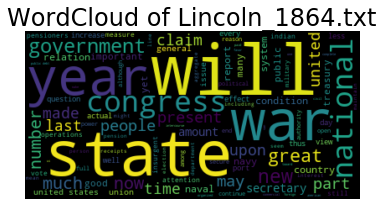

In [277]:
speech_name = 'Lincoln_1864.txt'
sotu_dict[path + '\\' + speech_name]
#example = sotu_data[0]
example = sotu_dict[path + '\\' + speech_name]
wordcloud = WordCloud(max_words=100).generate(example)
plt.title("WordCloud of " + speech_name)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()